# What is the best data science content to write about?

I'm exploring the website Stack Exchange. Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

I'll be looking into the [Data Science](https://datascience.stackexchange.com/) area of the website to help answer the following question. What content should a data science education company create, based on interest by subject? 

### What type of questions are welcome on this site?

According to Stack Exchange's help center's [section on questions](https://datascience.stackexchange.com/help/asking), we should:

* Avoid asking subjective questions.
* Ask practical questions about Data Science.
* Ask specfic questions.
* Make questions relevant to others.

All of these characteristics should be helpful to our goal.

### What, other than questions, does the [home](https://datascience.stackexchange.com/) subdivide do?

On the homne page we can see that it has four sections:

- Questions - a list of questions asked
- Tags - a list of keywords or labels, otherwise known as tags.
- User - a list of users.
- Unanswered - a list of unanswered questions.

The list of tags looks to be the most useful to answering our question. We can use these tags to quantify the number of questions asked about each subject.

### What information is available in each post?

Using [this](https://datascience.stackexchange.com/questions/63118/can-the-same-cnn-architecture-be-used-for-different-data-sets) questions as an example, we can the following information:

- For questions only:
    - The last time the question was active.
    - How many times the questions was viewed.
    - Related questions.
    - The question's tags.
- For both questions and answers:
    - The posts's score.
    - The posts's title.
    - The posts's author.
    - The posts's body.

### Stack Exchange Data Explorer

Stack Exchange provides a public data base where you can query and explore the database. This can be found [here](https://data.stackexchange.com/datascience/query/new)

Running a few exploratory queries, leads us to focus our efforts on Posts table. For examples, the Tags table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

| Id | TagName | Count | ExcerptPostId | WikiPostId |
| --- | --- | --- | --- | --- |
| 2	| machine-learning | 7478 | 4909 | 4908 |
| 46 | python | 4262 | 5523 | 5522 |
| 81 | neural-network | 3109 | 8885 | 8884 |
| 194 | deep-learningg | 2996 | 8956 | 8955 |
| 77 | classification | 2024 | 4911 | 4910 |
| 324 | keras | 1903 | 9251 | 9250 |
| 128 | scikit-learn | 1416 | 5896 | 5895 |
| 321 | tensorflow | 1347 | 9183 | 9182 |
| 47 | nlp | 1288 | 147 | 146 |
| 24 | r | 1163 | 49 | 48 |


### Getting the Data

To get the relevant data I'll run the following query.

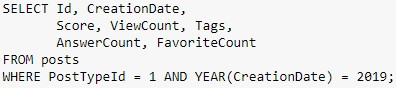

I'll then save the CSV file containing the above to help answer our question.

### Exploring the Data

We can read in the data while immediatlwey making sure CreationDate will be stoed as a datetime object.

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [309]:
# Read the file and change CreationDate data type to datetime
questions = pd.read_csv(r'C:\Users\chizj\Downloads\DataQuest CSVs\QueryResults.csv', parse_dates=['CreationDate'])
questions.info()

# Find out how many missing values per column.
questions.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506 entries, 0 to 8505
Data columns (total 7 columns):
Id               8506 non-null int64
CreationDate     8506 non-null datetime64[ns]
Score            8506 non-null int64
ViewCount        8506 non-null int64
Tags             8506 non-null object
AnswerCount      8506 non-null int64
FavoriteCount    1482 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 465.3+ KB


Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7024
dtype: int64

In [310]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60201,2019-09-14 18:00:57,1,39,<machine-learning><optimization><data-science-...,1,NaN
1,60202,2019-09-14 18:14:22,1,32,<reinforcement-learning>,0,NaN
2,60204,2019-09-14 20:20:36,3,34,<clustering><unsupervised-learning><image-prep...,0,NaN
3,60205,2019-09-14 23:28:38,1,39,<machine-learning><regularization><mnist>,0,NaN
4,60207,2019-09-15 00:15:02,2,39,<machine-learning><neural-network><keras><opti...,1,NaN


### Cleaning the Data

Fortnuately, the data provided is very clean. I just need to do the following:
- Fix the null values in the FavoriteCount column.
- Set the appropiate types for the columns.
- Clean the Tags column to fit the purpose of the project.

In [311]:
# Fix the null values
questions.fillna(0, inplace=True)

# Set appropiate types
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

# Clean the tags column
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,60201,2019-09-14 18:00:57,1,39,"[machine-learning, optimization, data-science-...",1,0
1,60202,2019-09-14 18:14:22,1,32,[reinforcement-learning],0,0
2,60204,2019-09-14 20:20:36,3,34,"[clustering, unsupervised-learning, image-prep...",0,0
3,60205,2019-09-14 23:28:38,1,39,"[machine-learning, regularization, mnist]",0,0
4,60207,2019-09-15 00:15:02,2,39,"[machine-learning, neural-network, keras, opti...",1,0


### Most Used and Most Viewed

I'll now focus on determining the most popular tags. I'll do so by considering two different popularity proxies: for each tag I'll count how many times the tag was used, and how many times a question with that tag was viewed.

I could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but I'll limit the focus of our research to counts and views for now.

In [312]:
# I'll first count how many times each tag was used
tag_count = {}

for row in questions['Tags']:
    for tag in row:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [313]:
# To make it more legible I'll turn tag_count into a dataframe
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: 'Count'}, inplace=True)
top_tags = tag_count.sort_values(['Count']).tail(20)
print(top_tags)

                        Count
machine-learning-model    218
statistics                225
clustering                255
predictive-modeling       262
r                         262
dataset                   321
regression                336
pandas                    346
lstm                      379
time-series               445
cnn                       468
nlp                       477
scikit-learn              524
tensorflow                561
classification            666
keras                     905
neural-network           1024
deep-learning            1162
python                   1752
machine-learning         2607


In [314]:
# Count how many times each tag was viewed
tags_view_count = {}

for idx, tags in enumerate(questions['Tags']):
    for tag in tags:
        if tag in tags_view_count:
            tags_view_count[tag] += questions['ViewCount'].iloc[idx]
        else:
            tags_view_count[tag] = 1

tags_view_count = pd.DataFrame.from_dict(tags_view_count, orient='index')
tags_view_count.rename(columns={0: 'Views'}, inplace=True)
most_viewed = tags_view_count.sort_values(['Views']).tail(20)
print(most_viewed)

                   Views
data-mining        54778
csv                63019
dataset            64412
pytorch            65636
regression         72298
numpy              84507
time-series        99257
cnn               110463
lstm              110715
nlp               112362
dataframe         149391
classification    155747
tensorflow        193197
scikit-learn      204562
neural-network    281740
deep-learning     346121
pandas            372357
keras             409575
machine-learning  586699
python            881487


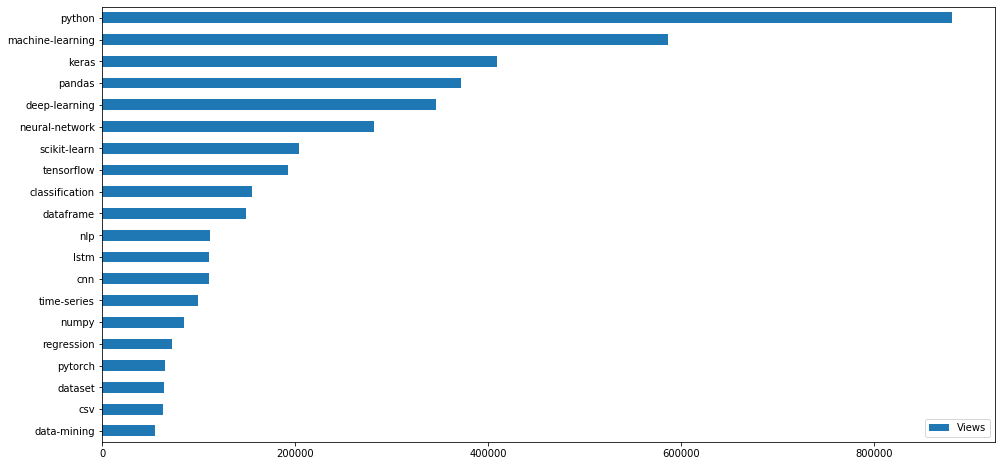

In [315]:
# View most_viewed visually on a graph
most_viewed.plot(kind='barh', figsize=(16,8))

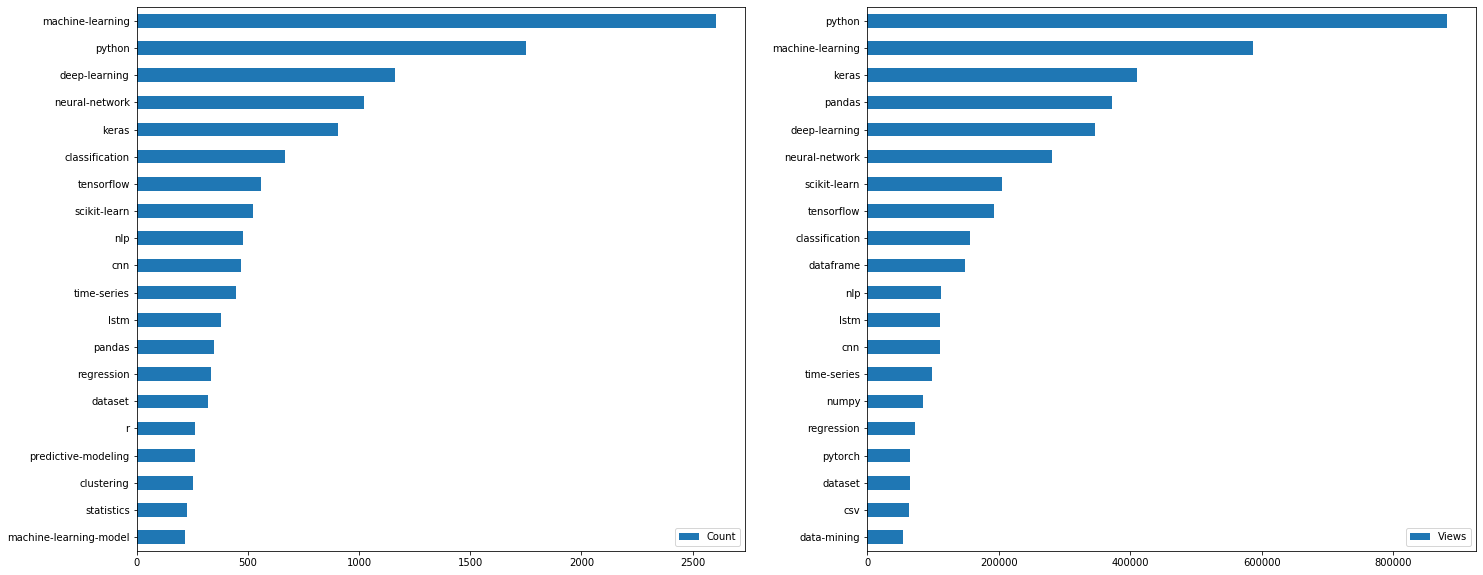

In [316]:
# View both tag_count and most_viewed as graphs side-by-side
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
top_tags.plot(kind='barh', figsize=(24,10), ax=ax1)
most_viewed.plot(kind='barh', figsize=(24,10), ax=ax2)

### Conclusion

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

### Just a Fad?

I want to solidify my findings with additional proof. 

Using the following SQL query I grabbed a CSV file with info on all the questions ever asked on Data Science Stack Exchange.

SELECT Id, CreationDate, Tags

FROM posts

WHERE PostTypeId = 1;

In [317]:
# Read in the CSV
all_q = pd.read_csv(r'C:\Users\chizj\Downloads\DataQuest CSVs\all_questions.csv', parse_dates=['CreationDate'])

In [318]:
# Transform the Tags column similarly to what we did previously
all_q['Tags'] = all_q['Tags'].str.replace("^<|>$", "").str.split('><')

In [319]:
all_q.head(10)

,Id,CreationDate,Tags
0,8837,2015-11-13 19:16:49,"[nlp, text-mining]"
1,8838,2015-11-13 21:41:18,[sas]
2,8840,2015-11-14 05:51:38,[scikit-learn]
3,8841,2015-11-14 05:58:56,"[machine-learning, classification, r, unbalanc..."
4,8846,2015-11-14 19:49:28,"[data-mining, reference-request, fuzzy-logic]"
5,8847,2015-11-15 00:45:03,"[python, feature-extraction, image-recognition]"
6,8850,2015-11-15 15:06:41,"[machine-learning, python, neural-network, dis..."
7,8853,2015-11-16 01:53:50,"[machine-learning, statistics, dimensionality-..."
8,8855,2015-11-16 08:15:55,"[machine-learning, neural-network, convnet]"
9,8857,2015-11-16 10:57:53,"[data-cleaning, preprocessing]"


Before deciding which questions should be classified as being deep learning questions, I should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag I'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in top_tags and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

I'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and I use it.

In [320]:
def deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

all_q['DeepLearning'] = all_q['Tags'].apply(deep_learning)

In [321]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
22753,8641,2015-10-29 09:48:39,"[clustering, experiments, methodology]",0
18565,66694,2020-01-19 04:55:44,"[pyspark, csv]",0
5622,9726,2016-01-10 17:10:59,[predictive-modeling],0
15325,49403,2019-04-16 13:56:07,"[machine-learning, logistic-regression, gradie...",0
3827,30765,2018-04-24 17:19:39,"[machine-learning, linear-regression, gradient...",0


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [322]:
all_q = all_q[all_q['CreationDate'].dt.year < 2020]

In [323]:
# Create a column that identifies the quarter the question was asked in.
def quarter_asked(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month - 1) // 3) + 1)
    return '{y}Q{q}'.format(y=year, q=quarter)

In [324]:
all_q['Quarter Asked'] = all_q['CreationDate'].apply(quarter_asked)
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter Asked
0,8837,2015-11-13 19:16:49,"[nlp, text-mining]",0,15Q4
1,8838,2015-11-13 21:41:18,[sas],0,15Q4
2,8840,2015-11-14 05:51:38,[scikit-learn],1,15Q4
3,8841,2015-11-14 05:58:56,"[machine-learning, classification, r, unbalanc...",0,15Q4
4,8846,2015-11-14 19:49:28,"[data-mining, reference-request, fuzzy-logic]",0,15Q4


For the final stretch of this screen, we'll group by quarter and:

- Count the number of deep learning questions.
- Count the total number of questions.
- Compute the ratio between the two numbers above.

In [325]:
quarter = all_q.groupby('Quarter Asked').agg({'DeepLearning': ['sum', 'size']})
quarter.columns = ['Deep Learning Questions', 'Total Questions']
quarter['Deep Learning Rate'] = quarter['Deep Learning Questions'] / quarter['Total Questions']

In [326]:
# To help with visualization.
quarter.reset_index(inplace=True)
quarter.sample(5)

,Quarter Asked,Deep Learning Questions,Total Questions,Deep Learning Rate
15,18Q1,553,1219,0.453651
22,19Q4,806,2023,0.398418
5,15Q3,45,311,0.144695
6,15Q4,66,382,0.172775
0,14Q2,9,157,0.057325


Now, I'll use a graph to easily show the rate at which deep lerning questions are being asked relative to other types of questions.

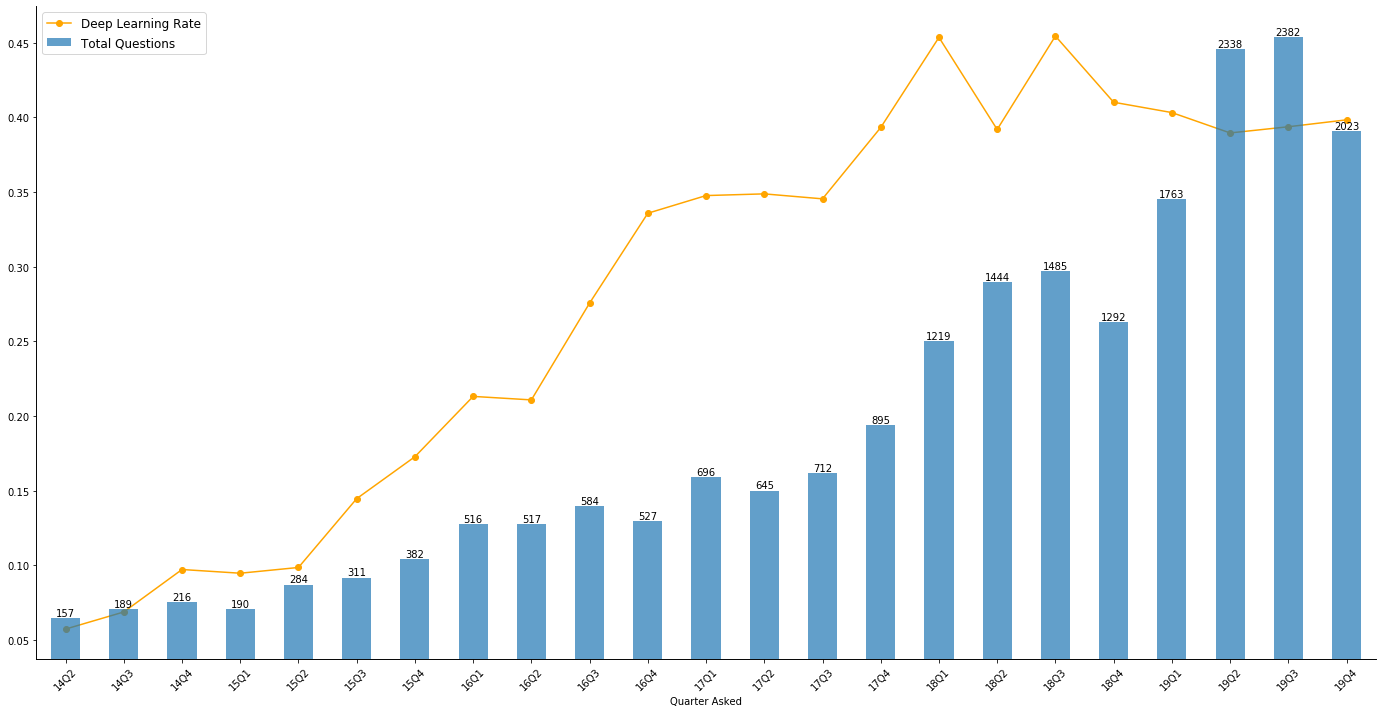

In [327]:
ax1 = quarter.plot(x="Quarter Asked", y="Deep Learning Rate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarter.plot(x="Quarter Asked", y="Total Questions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarter["Total Questions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of Data Science Stack Exchange and it looks like it is plateauing. However, there is no evidence to suggest that interest in deep learning is decreasing and so propose that we create deep learning content.